
#Sarcasm Detection on Airline Reviews - Data Preprocessing

This notebook demonstrates the steps for preprocessing a dataset for sarcasm detection in Airline Reviews using deep learning. The preprocessing steps include loading the dataset, cleaning the data, and preparing the data for model training.

#Dataset Overview
We are using a dataset of YouTube comments which contains the following columns:

`Review`: The text of the YouTube comment.

`sarcasm`: The target label indicating whether the comment is sarcastic (1) or not (0).


Additional features related to airline information.

Let's load the dataset and take a look at its structure.

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Replace with the path to your file in Google Drive
file_path = '/content/drive/My Drive/Airline_Reviews_Labeled.csv'
df = pd.read_csv(file_path)


# Display basic information about the dataset
print("Dataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              23171 non-null  int64  
 1   Airline Name            23171 non-null  object 
 2   Overall_Rating          23171 non-null  object 
 3   Review_Title            23171 non-null  object 
 4   Review Date             23171 non-null  object 
 5   Verified                23171 non-null  bool   
 6   Review                  23171 non-null  object 
 7   Aircraft                7129 non-null   object 
 8   Type Of Traveller       19433 non-null  object 
 9   Seat Type               22075 non-null  object 
 10  Route                   19343 non-null  object 
 11  Date Flown              19417 non-null  object 
 12  Seat Comfort            19016 non-null  float64
 13  Cabin Staff Service     18911 non-null  float64
 14  Food & Beverages        

In [100]:
# Randomly sample 8000 records
df_sampled = df.sample(n=8000, random_state=42)

# Save the sampled dataset to a new CSV file
df_sampled.to_csv('sampled_dataset.csv', index=False)


In [101]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Unnamed: 0                    0
Airline Name                  0
Overall_Rating                0
Review_Title                  0
Review Date                   0
Verified                      0
Review                        0
Aircraft                  16042
Type Of Traveller          3738
Seat Type                  1096
Route                      3828
Date Flown                 3754
Seat Comfort               4155
Cabin Staff Service        4260
Food & Beverages           8671
Ground Service             4793
Inflight Entertainment    12342
Wifi & Connectivity       17251
Value For Money            1066
Recommended                   0
sarcasm                       0
dtype: int64


In [102]:
# List of columns to drop
columns_to_drop = [
    'Unnamed: 0','Airline Name','Overall_Rating','Review_Title','Review Date',
    'Verified','Aircraft','Type Of Traveller','Route', 'Seat Type', 'Date Flown',
    'Seat Comfort','Cabin Staff Service', 'Food & Beverages',
    'Ground Service', 'Inflight Entertainment',
    'Wifi & Connectivity', 'Value For Money','Recommended',
    ]
# Drop the specified columns
df = df_sampled.drop(columns=columns_to_drop)

# Display the first few rows of the updated DataFrame
print(df.head())

                                                  Review  sarcasm
17155    Tel Aviv to Amman. We had a short flight to ...        1
10119    Flight got delayed when I was flying to DR f...        1
18821   Flying alone, my 14 year old daughter’s fligh...        1
10628    Pune to Delhi. This airline misleads it’s cu...        1
2188    I fly this route from Malta to Amsterdam almo...        1


In [103]:
df.head()

,Review,sarcasm
17155,Tel Aviv to Amman. We had a short flight to ...,1
10119,Flight got delayed when I was flying to DR f...,1
18821,"Flying alone, my 14 year old daughter’s fligh...",1
10628,Pune to Delhi. This airline misleads it’s cu...,1
2188,I fly this route from Malta to Amsterdam almo...,1


In [104]:
# Describe the dataset to get an overview of numerical features
print("\nDataset Description:")
print(df.describe())


Dataset Description:
           sarcasm
count  8000.000000
mean      0.713125
std       0.452331
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000


In [105]:
df.shape

(8000, 2)

In [106]:
df.duplicated().sum()

10

In [107]:
# Remove duplicates
df_no_duplicates = df.drop_duplicates()

# Display the DataFrame after removing duplicates
print("\nDataFrame after removing duplicates:")
print(df_no_duplicates)
df = df_no_duplicates


DataFrame after removing duplicates:
                                                  Review  sarcasm
17155    Tel Aviv to Amman. We had a short flight to ...        1
10119    Flight got delayed when I was flying to DR f...        1
18821   Flying alone, my 14 year old daughter’s fligh...        1
10628    Pune to Delhi. This airline misleads it’s cu...        1
2188    I fly this route from Malta to Amsterdam almo...        1
...                                                  ...      ...
8342     The flight was delayed for 2.5hrs, causing u...        1
16264    They cancelled my flight and after delaying ...        1
11056    Hong Kong to Chengdu. Hong Kong Airlines is ...        1
16769    Horrible experience with REX Airlines. Tried...        1
1496     The reviews prior to booking were a concern ...        0

[7990 rows x 2 columns]


#Data Visualization

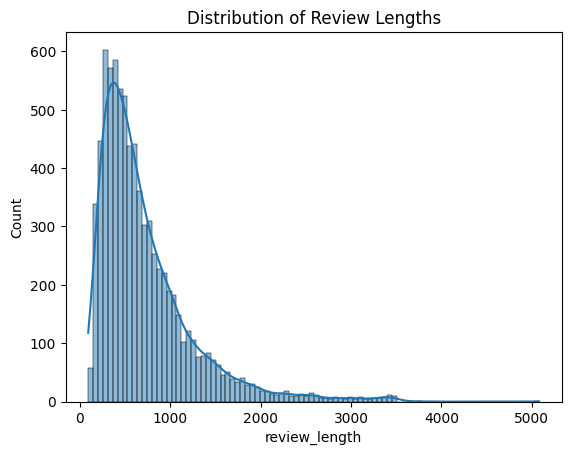

In [108]:
# Analyze the length of reviews
df['review_length'] = df['Review'].apply(len)
sns.histplot(df['review_length'], kde=True)
plt.title('Distribution of Review Lengths')
plt.show()

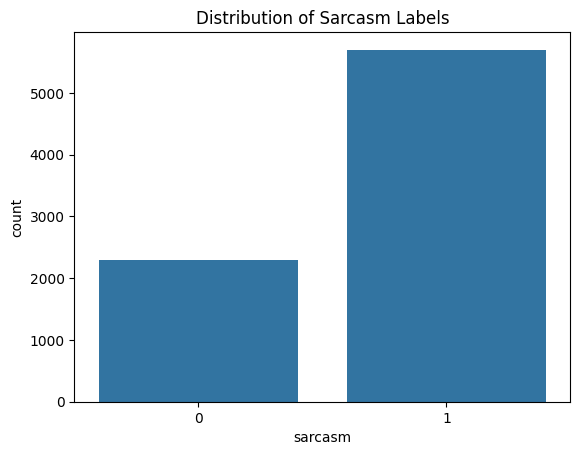

In [109]:
# Visualize the distribution of the target variable (sarcasm labels)
sns.countplot(x='sarcasm', data=df)
plt.title('Distribution of Sarcasm Labels')
plt.show()

#Data cleaning

This involves cleaning the review by removing hashtags, mentions, URLs etc.

In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Ensure necessary NLTK data packages are downloaded
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [111]:
# Text Cleaning
def clean_text(text):
    text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML tags
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@w+|\#','', text)  # Remove mentions and hashtags
    text = re.sub(r'[^A-Za-z0-9]+', ' ', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    return text

Tried different tokenizaton and text encoding methods.

A. word Tokenization, Sentence Tokenization, Subword Tokenization, Character Tokenization.

B. Word2Vec, TF-IDF and FastText Embeddings.

#Preprocessing steps

A. Word Tokenization

1. Tokenization
2. Stop Words Removal
2. Lemmatization
5. Label Encoding
6. Class balacing
7. Word2Vec with word tokenization



In [112]:
df['cleaned_review'] = df['Review'].apply(clean_text)
# Tokenization
df['tokens'] = df['cleaned_review'].apply(word_tokenize)

<ipython-input-111-153936503a16>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML tags


In [113]:
# Stop Words Removal
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

In [114]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
df['lemmatized_tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [115]:
# Join lemmatized tokens back into a string
df['final_review'] = df['lemmatized_tokens'].apply(lambda x: ' '.join(x))

In [116]:
# Feature Engineering
df['review_length'] = df['cleaned_review'].apply(len)
df['num_exclamations'] = df['cleaned_review'].apply(lambda x: x.count('!'))

In [117]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sarcasm_encoded'] = le.fit_transform(df['sarcasm'])

In [118]:
df.head()

,Review,sarcasm,review_length,cleaned_review,tokens,lemmatized_tokens,final_review,num_exclamations,Sarcasm_encoded
17155,Tel Aviv to Amman. We had a short flight to ...,1,330,tel aviv to amman we had a short flight to co...,"[tel, aviv, amman, short, flight, connect, amm...","[tel, aviv, amman, short, flight, connect, amm...",tel aviv amman short flight connect amman conn...,0,1
10119,Flight got delayed when I was flying to DR f...,1,660,flight got delayed when i was flying to dr fo...,"[flight, got, delayed, flying, dr, hour, way, ...","[flight, got, delayed, flying, dr, hour, way, ...",flight got delayed flying dr hour way back got...,0,1
18821,"Flying alone, my 14 year old daughter’s fligh...",1,478,flying alone my 14 year old daughter s flight...,"[flying, alone, 14, year, old, daughter, fligh...","[flying, alone, 14, year, old, daughter, fligh...",flying alone 14 year old daughter flight cance...,0,1
10628,Pune to Delhi. This airline misleads it’s cu...,1,411,pune to delhi this airline misleads it s cust...,"[pune, delhi, airline, misleads, customers, ex...","[pune, delhi, airline, misleads, customer, exp...",pune delhi airline misleads customer experienc...,0,1
2188,I fly this route from Malta to Amsterdam almo...,1,336,i fly this route from malta to amsterdam almo...,"[fly, route, malta, amsterdam, almost, every, ...","[fly, route, malta, amsterdam, almost, every, ...",fly route malta amsterdam almost every week tr...,0,1


In [119]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import numpy as np
import pandas as pd

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=df['final_review'], vector_size=100, window=5, min_count=1, workers=4)

# Function to get averaged word vectors for a review
def get_average_word_vectors(tokens, model):
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)  # Return zero vector if no tokens are in the vocabulary

# Apply Word2Vec to each review and get the averaged vectors
df['word2vec_avg'] = df['final_review'].apply(lambda tokens: get_average_word_vectors(tokens, word2vec_model))

# Convert the averaged vectors to a DataFrame
word2vec_df = pd.DataFrame(df['word2vec_avg'].tolist(), columns=[f'word2vec_{i}' for i in range(word2vec_model.vector_size)])

# Concatenate with existing dataset (assuming data_final already includes encoded features)
data_final_word2vec = pd.concat([df.reset_index(drop=True), word2vec_df], axis=1)

# Display the final dataset with Word2Vec features
print(data_final_word2vec.head())


                                              Review  sarcasm  review_length  \
0    Tel Aviv to Amman. We had a short flight to ...        1            330   
1    Flight got delayed when I was flying to DR f...        1            660   
2   Flying alone, my 14 year old daughter’s fligh...        1            478   
3    Pune to Delhi. This airline misleads it’s cu...        1            411   
4   I fly this route from Malta to Amsterdam almo...        1            336   

                                      cleaned_review  \
0   tel aviv to amman we had a short flight to co...   
1   flight got delayed when i was flying to dr fo...   
2   flying alone my 14 year old daughter s flight...   
3   pune to delhi this airline misleads it s cust...   
4   i fly this route from malta to amsterdam almo...   

                                              tokens  \
0  [tel, aviv, amman, short, flight, connect, amm...   
1  [flight, got, delayed, flying, dr, hour, way, ...   
2  [flying, al

#Model Training



In [120]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Assuming X is your feature matrix from Word2Vec
X = np.array(df['word2vec_avg'].tolist())
y = np.array(df['Sarcasm_encoded'])

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert X_resampled and y_resampled back to DataFrame if needed
X_resampled_df = pd.DataFrame(X_resampled, columns=[f'word2vec_{i}' for i in range(X.shape[1])])
y_resampled_df = pd.DataFrame(y_resampled, columns=['Sarcasm_encoded'])

# Concatenate X_resampled_df and y_resampled_df into a new balanced DataFrame
balanced_df = pd.concat([X_resampled_df, y_resampled_df], axis=1)

#Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the Random Forest model
clf = RandomForestClassifier(n_estimators=50, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8026315789473685
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81      1174
           1       0.80      0.79      0.80      1106

    accuracy                           0.80      2280
   macro avg       0.80      0.80      0.80      2280
weighted avg       0.80      0.80      0.80      2280



#Modle Training

TF-IDF with word tokenization

In [123]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(df['final_review']).toarray()

# Split the data into training and testing sets
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, df['Sarcasm_encoded'], test_size=0.2, random_state=42)

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_tfidf, y_train)

# Train the Random Forest model on the balanced data
clf = RandomForestClassifier(n_estimators=50, random_state=42)
clf.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = clf.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8723404255319149
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       474
           1       0.92      0.89      0.91      1124

    accuracy                           0.87      1598
   macro avg       0.84      0.86      0.85      1598
weighted avg       0.88      0.87      0.87      1598



#SubWord tokenization

1. Tokenization
2. Stop Words Removal
3. Lemmatization
4. Class balacing
4. Word2Vec with Sentence tokenization

In [131]:
from transformers import AutoTokenizer

# Load the BERT tokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

# Function to tokenize a review using BERT tokenizer
def subword_tokenize(text):
    return tokenizer.tokenize(text)

# Apply the subword_tokenize function to the cleaned_review column
df['subword_tokens'] = df['cleaned_review'].apply(subword_tokenize)

# Display the DataFrame with subword tokenized words
print(df)


Token indices sequence length is longer than the specified maximum sequence length for this model (517 > 512). Running this sequence through the model will result in indexing errors


                                                  Review  sarcasm  \
17155    Tel Aviv to Amman. We had a short flight to ...        1   
10119    Flight got delayed when I was flying to DR f...        1   
18821   Flying alone, my 14 year old daughter’s fligh...        1   
10628    Pune to Delhi. This airline misleads it’s cu...        1   
2188    I fly this route from Malta to Amsterdam almo...        1   
...                                                  ...      ...   
8342     The flight was delayed for 2.5hrs, causing u...        1   
16264    They cancelled my flight and after delaying ...        1   
11056    Hong Kong to Chengdu. Hong Kong Airlines is ...        1   
16769    Horrible experience with REX Airlines. Tried...        1   
1496     The reviews prior to booking were a concern ...        0   

       review_length                                     cleaned_review  \
17155            330   tel aviv to amman we had a short flight to co...   
10119            660 

In [132]:
# Stop Words Removal
stop_words = set(stopwords.words('english'))
df['subword_tokens'] = df['subword_tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# Lemmatization
lemmatizer = WordNetLemmatizer()
df['lemmatized_tokens_sub'] = df['subword_tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


In [135]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import numpy as np
import pandas as pd

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=df['lemmatized_tokens_sub'], vector_size=100, window=5, min_count=1, workers=4)

# Function to get averaged word vectors for a review
def get_average_word_vectors(tokens, model):
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)  # Return zero vector if no tokens are in the vocabulary

# Apply Word2Vec to each review and get the averaged vectors
df['word2vec_avg1'] = df['lemmatized_tokens_sub'].apply(lambda tokens: get_average_word_vectors(tokens, word2vec_model))

# Convert the averaged vectors to a DataFrame
word2vec_df = pd.DataFrame(df['word2vec_avg1'].tolist(), columns=[f'word2vec1_{i}' for i in range(word2vec_model.vector_size)])

# Concatenate with existing dataset (assuming data_final already includes encoded features)
data_final_word2vec1 = pd.concat([df.reset_index(drop=True), word2vec_df], axis=1)

# Display the final dataset with Word2Vec features
print(data_final_word2vec1.head())


                                              Review  sarcasm  review_length  \
0    Tel Aviv to Amman. We had a short flight to ...        1            330   
1    Flight got delayed when I was flying to DR f...        1            660   
2   Flying alone, my 14 year old daughter’s fligh...        1            478   
3    Pune to Delhi. This airline misleads it’s cu...        1            411   
4   I fly this route from Malta to Amsterdam almo...        1            336   

                                      cleaned_review  \
0   tel aviv to amman we had a short flight to co...   
1   flight got delayed when i was flying to dr fo...   
2   flying alone my 14 year old daughter s flight...   
3   pune to delhi this airline misleads it s cust...   
4   i fly this route from malta to amsterdam almo...   

                                              tokens  \
0  [tel, aviv, amman, short, flight, connect, amm...   
1  [flight, got, delayed, flying, dr, hour, way, ...   
2  [flying, al

In [136]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Assuming X is your feature matrix from Word2Vec
X = np.array(df['word2vec_avg1'].tolist())
y = np.array(df['Sarcasm_encoded'])

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert X_resampled and y_resampled back to DataFrame if needed
X_resampled_df = pd.DataFrame(X_resampled, columns=[f'word2vec1_{i}' for i in range(X.shape[1])])
y_resampled_df = pd.DataFrame(y_resampled, columns=['Sarcasm_encoded'])

# Concatenate X_resampled_df and y_resampled_df into a new balanced DataFrame
balanced_df = pd.concat([X_resampled_df, y_resampled_df], axis=1)

#Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the Random Forest model
clf = RandomForestClassifier(n_estimators=50, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9008771929824562
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      1174
           1       0.92      0.87      0.89      1106

    accuracy                           0.90      2280
   macro avg       0.90      0.90      0.90      2280
weighted avg       0.90      0.90      0.90      2280



In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split


# Concatenate tokenized sentences into strings for each review
df['concatenated_sentences'] = df['lemmatized_tokens_sub'].apply(lambda tokens: ' '.join(tokens))

vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(df['concatenated_sentences']).toarray()

# Split the data into training and testing sets
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, df['Sarcasm_encoded'], test_size=0.2, random_state=42)

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_tfidf, y_train)

# Train the Random Forest model on the balanced data
clf = RandomForestClassifier(n_estimators=50, random_state=42)
clf.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = clf.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8811013767209012
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.83      0.81       474
           1       0.93      0.90      0.91      1124

    accuracy                           0.88      1598
   macro avg       0.85      0.87      0.86      1598
weighted avg       0.88      0.88      0.88      1598



In [137]:
import pandas as pd
from gensim.models import FastText
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import numpy as np

# Train FastText model
fasttext_model = FastText(sentences=df['lemmatized_tokens_sub'], vector_size=100, window=5, min_count=1, workers=4)

# Get FastText embeddings for each sentence
def get_sentence_embedding(sentence, model):
    return np.mean([model.wv[token] for token in sentence if token in model.wv], axis=0)

X = np.array([get_sentence_embedding(tokens, fasttext_model) for tokens in df['lemmatized_tokens_sub']])
y = np.array(df['Sarcasm_encoded'])

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the Random Forest model
clf = RandomForestClassifier(n_estimators=50, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8912280701754386
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      1174
           1       0.91      0.86      0.88      1106

    accuracy                           0.89      2280
   macro avg       0.89      0.89      0.89      2280
weighted avg       0.89      0.89      0.89      2280






# Sentence Tokenization using spacy

1. Tokenization
2. Stop Words Removal
3. Lemmatization
4. Word2Vec with Sentence tokenization
5. TF-IDF
6. FastText embeddings





In [143]:
import spacy

# Load the SpaCy model
nlp = spacy.load('en_core_web_sm')

# Function to tokenize a review into sentences
def sentence_tokenize(text):
    doc = nlp(text)
    return [sent.text for sent in doc.sents]

# Apply the sentence_tokenize function to the review column
df['sentence_tokens'] = df['cleaned_review'].apply(sentence_tokenize)

# Display the DataFrame with tokenized sentences
print(df)


                                                  Review  sarcasm  \
17155    Tel Aviv to Amman. We had a short flight to ...        1   
10119    Flight got delayed when I was flying to DR f...        1   
18821   Flying alone, my 14 year old daughter’s fligh...        1   
10628    Pune to Delhi. This airline misleads it’s cu...        1   
2188    I fly this route from Malta to Amsterdam almo...        1   
...                                                  ...      ...   
8342     The flight was delayed for 2.5hrs, causing u...        1   
16264    They cancelled my flight and after delaying ...        1   
11056    Hong Kong to Chengdu. Hong Kong Airlines is ...        1   
16769    Horrible experience with REX Airlines. Tried...        1   
1496     The reviews prior to booking were a concern ...        0   

       review_length                                     cleaned_review  \
17155            330   tel aviv to amman we had a short flight to co...   
10119            660 

In [144]:
# Stop Words Removal
stop_words = set(stopwords.words('english'))
df['sentence_tokens'] = df['sentence_tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# Lemmatization
lemmatizer = WordNetLemmatizer()
df['lemmatized_tokens_sentence'] = df['sentence_tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


In [145]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import numpy as np
import pandas as pd

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=df['lemmatized_tokens_sentence'], vector_size=100, window=5, min_count=1, workers=4)

# Function to get averaged word vectors for a review
def get_average_word_vectors(tokens, model):
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)  # Return zero vector if no tokens are in the vocabulary

# Apply Word2Vec to each review and get the averaged vectors
df['word2vec_avg3'] = df['lemmatized_tokens_sentence'].apply(lambda tokens: get_average_word_vectors(tokens, word2vec_model))

# Convert the averaged vectors to a DataFrame
word2vec_df = pd.DataFrame(df['word2vec_avg3'].tolist(), columns=[f'word2vec3_{i}' for i in range(word2vec_model.vector_size)])

# Concatenate with existing dataset (assuming data_final already includes encoded features)
data_final_word2vec3 = pd.concat([df.reset_index(drop=True), word2vec_df], axis=1)

# Display the final dataset with Word2Vec features
print(data_final_word2vec3.head())


                                              Review  sarcasm  review_length  \
0    Tel Aviv to Amman. We had a short flight to ...        1            330   
1    Flight got delayed when I was flying to DR f...        1            660   
2   Flying alone, my 14 year old daughter’s fligh...        1            478   
3    Pune to Delhi. This airline misleads it’s cu...        1            411   
4   I fly this route from Malta to Amsterdam almo...        1            336   

                                      cleaned_review  \
0   tel aviv to amman we had a short flight to co...   
1   flight got delayed when i was flying to dr fo...   
2   flying alone my 14 year old daughter s flight...   
3   pune to delhi this airline misleads it s cust...   
4   i fly this route from malta to amsterdam almo...   

                                              tokens  \
0  [tel, aviv, amman, short, flight, connect, amm...   
1  [flight, got, delayed, flying, dr, hour, way, ...   
2  [flying, al

In [146]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Assuming X is your feature matrix from Word2Vec
X = np.array(df['word2vec_avg2'].tolist())
y = np.array(df['Sarcasm_encoded'])

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert X_resampled and y_resampled back to DataFrame if needed
X_resampled_df = pd.DataFrame(X_resampled, columns=[f'word2vec2_{i}' for i in range(X.shape[1])])
y_resampled_df = pd.DataFrame(y_resampled, columns=['Sarcasm_encoded'])

# Concatenate X_resampled_df and y_resampled_df into a new balanced DataFrame
balanced_df = pd.concat([X_resampled_df, y_resampled_df], axis=1)

#Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the Random Forest model
clf = RandomForestClassifier(n_estimators=50, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6552631578947369
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.71      0.68      1174
           1       0.66      0.60      0.63      1106

    accuracy                           0.66      2280
   macro avg       0.66      0.65      0.65      2280
weighted avg       0.66      0.66      0.65      2280



#Character tokenization



1. Tokenization
2. Stop Words Removal
3. Lemmatization
4. Word2Vec with Sentence tokenization
6. FastText embeddings



In [147]:
# Function to tokenize a review at the character level
def char_tokenize(text):
    return list(text)

# Apply the char_tokenize function to the cleaned_review column
df['char_tokens'] = df['cleaned_review'].apply(char_tokenize)

# Display the DataFrame with character tokenized reviews
print(df)


                                                  Review  sarcasm  \
17155    Tel Aviv to Amman. We had a short flight to ...        1   
10119    Flight got delayed when I was flying to DR f...        1   
18821   Flying alone, my 14 year old daughter’s fligh...        1   
10628    Pune to Delhi. This airline misleads it’s cu...        1   
2188    I fly this route from Malta to Amsterdam almo...        1   
...                                                  ...      ...   
8342     The flight was delayed for 2.5hrs, causing u...        1   
16264    They cancelled my flight and after delaying ...        1   
11056    Hong Kong to Chengdu. Hong Kong Airlines is ...        1   
16769    Horrible experience with REX Airlines. Tried...        1   
1496     The reviews prior to booking were a concern ...        0   

       review_length                                     cleaned_review  \
17155            330   tel aviv to amman we had a short flight to co...   
10119            660 

In [148]:
# Stop Words Removal
stop_words = set(stopwords.words('english'))
df['char_tokens'] = df['char_tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# Lemmatization
lemmatizer = WordNetLemmatizer()
df['lemmatized_tokens_char'] = df['char_tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


In [149]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import numpy as np
import pandas as pd

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=df['lemmatized_tokens_char'], vector_size=100, window=5, min_count=1, workers=4)

# Function to get averaged word vectors for a review
def get_average_word_vectors(tokens, model):
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)  # Return zero vector if no tokens are in the vocabulary

# Apply Word2Vec to each review and get the averaged vectors
df['word2vec_avg2'] = df['lemmatized_tokens_char'].apply(lambda tokens: get_average_word_vectors(tokens, word2vec_model))

# Convert the averaged vectors to a DataFrame
word2vec_df = pd.DataFrame(df['word2vec_avg2'].tolist(), columns=[f'word2vec2_{i}' for i in range(word2vec_model.vector_size)])

# Concatenate with existing dataset (assuming data_final already includes encoded features)
data_final_word2vec2 = pd.concat([df.reset_index(drop=True), word2vec_df], axis=1)

# Display the final dataset with Word2Vec features
print(data_final_word2vec2.head())




                                              Review  sarcasm  review_length  \
0    Tel Aviv to Amman. We had a short flight to ...        1            330   
1    Flight got delayed when I was flying to DR f...        1            660   
2   Flying alone, my 14 year old daughter’s fligh...        1            478   
3    Pune to Delhi. This airline misleads it’s cu...        1            411   
4   I fly this route from Malta to Amsterdam almo...        1            336   

                                      cleaned_review  \
0   tel aviv to amman we had a short flight to co...   
1   flight got delayed when i was flying to dr fo...   
2   flying alone my 14 year old daughter s flight...   
3   pune to delhi this airline misleads it s cust...   
4   i fly this route from malta to amsterdam almo...   

                                              tokens  \
0  [tel, aviv, amman, short, flight, connect, amm...   
1  [flight, got, delayed, flying, dr, hour, way, ...   
2  [flying, al

In [152]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Assuming X is your feature matrix from Word2Vec
X = np.array(df['word2vec_avg2'].tolist())
y = np.array(df['Sarcasm_encoded'])

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert X_resampled and y_resampled back to DataFrame if needed
X_resampled_df = pd.DataFrame(X_resampled, columns=[f'word2vec2_{i}' for i in range(X.shape[1])])
y_resampled_df = pd.DataFrame(y_resampled, columns=['Sarcasm_encoded'])

# Concatenate X_resampled_df and y_resampled_df into a new balanced DataFrame
balanced_df = pd.concat([X_resampled_df, y_resampled_df], axis=1)

#Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the Random Forest model
clf = RandomForestClassifier(n_estimators=50, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8092105263157895
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82      1174
           1       0.82      0.77      0.80      1106

    accuracy                           0.81      2280
   macro avg       0.81      0.81      0.81      2280
weighted avg       0.81      0.81      0.81      2280



In [159]:
import pandas as pd
from gensim.models import FastText
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import numpy as np

# Train FastText model
fasttext_model = FastText(sentences=df['lemmatized_tokens_char'], vector_size=100, window=5, min_count=1, workers=4)

# Get FastText embeddings for each sentence
def get_sentence_embedding(sentence, model):
    return np.mean([model.wv[token] for token in sentence if token in model.wv], axis=0)

X = np.array([get_sentence_embedding(tokens, fasttext_model) for tokens in df['lemmatized_tokens_sub']])
y = np.array(df['Sarcasm_encoded'])

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the Random Forest model
clf = RandomForestClassifier(n_estimators=50, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8065789473684211
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82      1174
           1       0.82      0.77      0.80      1106

    accuracy                           0.81      2280
   macro avg       0.81      0.81      0.81      2280
weighted avg       0.81      0.81      0.81      2280



Conclusion : The highest accuracy was with Word2Vec with word tokens trained with random forest model with 90% accuracy.